In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import nltk

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [4]:
def trainAndValidate(x, y, title, subplot):
    x = np.array(x)
    y = np.array(y)

    # randomize data
    n = len(x)
    indices = np.random.choice(n, n, replace=False)
    x = x[indices]
    y = y[indices]
    
    # split into train, test and validation
    train_idx = int(n*.8)
    test_idx = int(n*.9)
    
    x_train = x[:train_idx,:]
    y_train = y[:train_idx]
    
    x_test = x[train_idx:test_idx,:]
    y_test = y[train_idx:test_idx]

    x_valid = x[test_idx:,:]
    y_valid = y[test_idx:]

    # build models
    models = []
#     models.append(RandomForestClassifier(n_estimators=1000, max_depth=None,random_state=0, oob_score=True))
#     models.append(MultinomialNB())
#     models.append(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1))
#     models.append(SVC(gamma='auto'))
#     models.append(GradientBoostingClassifier(n_estimators=100, learning_rate = .5, max_features=2, max_depth = 2, random_state = 0))
#     models.append(DummyClassifier(strategy='most_frequent', random_state=None, constant=None))
    models.append(('LR' , LogisticRegression()))
    models.append(('LDA' , LinearDiscriminantAnalysis()))
    models.append(('KNN' , KNeighborsClassifier()))
    models.append(('CART' , DecisionTreeClassifier()))
    models.append(('NB' , GaussianNB()))
    models.append(('SVM' , SVC()))
    models.append(('RF' , RandomForestClassifier(n_estimators=50)))
    models.append(('XGBoost', XGBClassifier()))

    training_errors = []
    validation_errors = []
    names = []
    n_groups = len(models)

    # test models
    print ("=== Accuracy ===")
    for name, model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        train_error = sum(y_test!=y_pred)/len(y_test)
        training_errors.append(train_error)

        pred_valid = model.predict(x_valid)
        valid_error = sum(np.array(y_valid)!=np.array(pred_valid))/len(y_valid)
        validation_errors.append(valid_error)
        accu_score = accuracy_score(y_test, y_pred)
        names.append(name)
        print(name + ": " + str(accu_score))

    # plot
    print ("=== Error Plot ===")
    ax = plt.subplot(1, 2, subplot)
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, training_errors, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Error')

    rects2 = plt.bar(index + bar_width, validation_errors, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Validation Error')

    #labels
    for i, v in enumerate(validation_errors):
        ax.text(index[i]+.10, v+.003, str(round(v,2)), color='red', fontweight='bold')
    for i, v in enumerate(training_errors):
        ax.text(index[i]-.25, v+.003, str(round(v,2)), color='blue', fontweight='bold')

    plt.xlabel('Model')
    plt.ylabel('Error')
    plt.ylim(0,1)
    plt.title(title)
    plt.xticks(index + bar_width, names)
    plt.legend()

    return models
    #plt.show()

number of samples: 856
=== Accuracy ===
LR: 0.5
LDA: 0.5
KNN: 0.406976744186
CART: 0.476744186047
NB: 0.5
SVM: 0.523255813953
RF: 0.46511627907
XGBoost: 0.546511627907
=== Error Plot ===


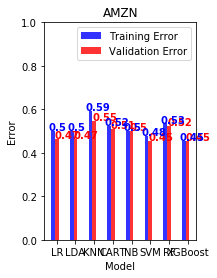

In [5]:
companies = ['AMZN']#['AMZN', 'FB', 'TSLA', 'GE', 'GS']
for company in companies:
    # Load data
    newsData = pd.read_csv("News/sentiment_" + company + ".csv", encoding = "ISO-8859-1")
    stockData = pd.read_csv("Prices/label_" + company + ".csv")
    newsData = newsData.rename(columns={"trading_date":"date"}) # rename column
    
    # Merge data frames
    merged_df = newsData[['date', 'compound','neg','neu','pos']].merge(stockData[['date','label']], how='inner', on='date', left_index=True)
    
    # Prepare samples and labels
    x = merged_df.loc[:,'compound':'pos']
    y = merged_df.loc[:,'label']
    
    print ("number of samples: " + str(len(x)))
    
    # Train, test and plot
    trainAndValidate(x, y, company, 2)
    plt.show()
    
    
    

In [11]:
x = merged_df.loc[:,'compound':'pos']
y = merged_df.loc[:,'label']

x = np.array(x)
y = np.array(y)

# randomize data
n = len(x)
indices = np.random.choice(n, n, replace=False)
x = x[indices]
y = y[indices]

# split into train, test and validation
train_idx = int(n*.8)
test_idx = int(n*.9)

x_train = x[:train_idx,:]
y_train = y[:train_idx]

x_test = x[train_idx:test_idx,:]
y_test = y[train_idx:test_idx]

x_valid = x[test_idx:,:]
y_valid = y[test_idx:]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(x_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.523255813953
confusion matrix: 
[[ 5 31]
 [10 40]]
classification report: 
             precision    recall  f1-score   support

          0       0.33      0.14      0.20        36
          1       0.56      0.80      0.66        50

avg / total       0.47      0.52      0.47        86



In [14]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

C:\Users\lxmxl\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.593023255814 at depth of 1 and estimator 150
Score is 0.558139534884 at depth of 2 and estimator 150
Score is 0.546511627907 at depth of 3 and estimator 150
Score is 0.604651162791 at depth of 4 and estimator 150
Score is 0.616279069767 at depth of 5 and estimator 150
Score is 0.546511627907 at depth of 6 and estimator 150
Score is 0.5 at depth of 7 and estimator 150
Score is 0.511627906977 at depth of 8 and estimator 150
Score is 0.523255813953 at depth of 9 and estimator 150
Score is 0.511627906977 at depth of 10 and estimator 150
Score is 0.523255813953 at depth of 11 and estimator 150
Score is 0.488372093023 at depth of 12 and estimator 150
Score is 0.593023255814 at depth of 1 and estimator 200
Score is 0.558139534884 at depth of 2 and estimator 200
Score is 0.53488372093 at depth of 3 and estimator 200
Score is 0.581395348837 at depth of 4 and estimator 200
Score is 0.546511627907 at depth of 5 and estimator 200
Score is 0.534883

In [16]:
features = merged_df.drop(['label'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = True)))
print (x)
print (y)

[0.2831004, 0.25357574, 0.23341987, 0.22990407]
['neg', 'compound', 'neu', 'date']


In [ ]:
x = merged_df.loc[:,['neg', 'compound', 'neu', 'date']]
Xi_train, Xi_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(Xi_train, y_train)
yi_pred = clf.predict(Xi_test)
score = accuracy_score(y_test, yi_pred)
print("Score is "+ str(score))